# Student Id: 1820345 

# Student Name : Fergus Mc Hale

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

from sklearn.utils import shuffle
from google.colab import files
import io

# Task 1
# Load bank.csv into a Pandas dataframe. Examine the first few data rows and the last few data rows. Identify an attribute that can be the target/dependable variable for 2-class classification.

In [2]:
uploaded = files.upload()

Saving bank_et1.csv to bank_et1.csv


In [0]:
CSV_SPLIT = ','
MAX_ITERATIONS = 10

In [0]:
#data = pd.read_csv('./data/bank_et1.csv',sep=CSV_SPLIT, delimiter=None,index_col='Unnamed: 0') #For local Machine

In [0]:
data = pd.read_csv(io.BytesIO(uploaded['bank_et1.csv']),sep=CSV_SPLIT, delimiter=None,index_col='Unnamed: 0') #For Goggle Colab

# Task 2
# Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis.ipynb” to perform EDA of the bank data set.

In [0]:
empty_data = data.isnull().sum() #Check for null values in field
y_pos = np.arange(len(empty_data))

<BarContainer object of 19 artists>

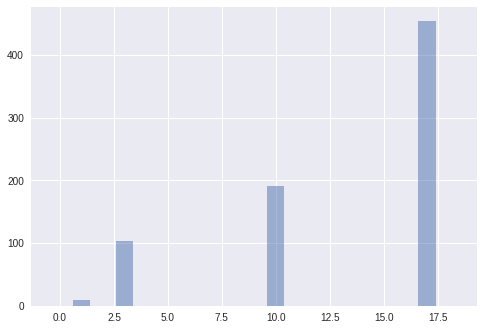

In [7]:
plt.bar(y_pos, empty_data, align='center', alpha=0.5)

# The following fields contain null values that have been replaced with values
# Job : 10
# Education : 104
# contact  : 191
# poutcome : 454
# These have been replaced to say unknown
# Graph highlights the bin counts of each

In [0]:
data["poutcome"].fillna("unknown", inplace = True) #Replace null values

In [0]:
data["education"].fillna("unknown", inplace = True)

In [0]:
data["job"].fillna("unknown", inplace = True)

In [0]:
data["contact"].fillna("unknown", inplace = True)

# Replace null values with unknown

# Calculate statistics for the numerical and categorical attributes.

In [12]:
data.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [13]:
data.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,unknown,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,unknown,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,unknown,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,unknown,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,unknown,20,sep,185,1,-1,0,unknown,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,unknown,yes


In [14]:
data.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


# Target Identification based on fields

In [15]:
print(data._get_numeric_data().columns)

Index(['age', 'balance', 'ratio_bal_ln', 'ratio_ln_inc', 'day', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')


Numerical Fields within the dataset

In [16]:
data.select_dtypes(include=['category', object]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

Categorical Fields within the dataset

# The age range is between 18 and 93 with the minimum age being 18
# The balance is can range from minus 980 to 8k with the minimum balance being in the negative
# A campaign can range in duration of between 1 and 11 days with the mimimum day of being one
# The payment days can be behind one day or max be 854 days with the mimimum of being a day behind in payment
# The duration can be between 7 days and 1,823 days

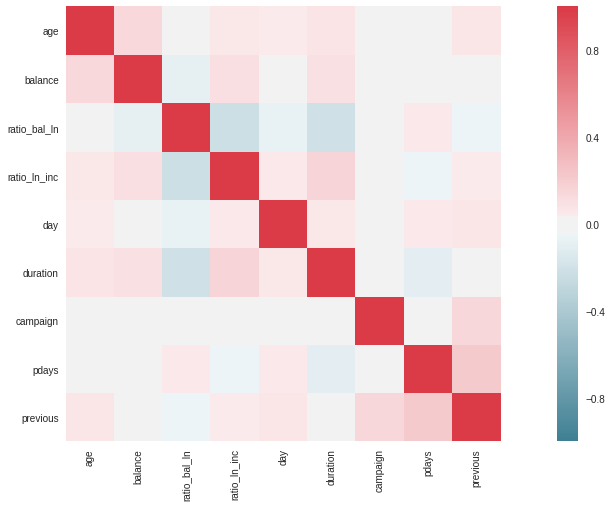

In [17]:
f, ax = plt.subplots(figsize=(20, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# There is no strong correlation between the columns.
# There is a low correlation between ratio_bal_In and ration_ln_inc

# Numerical Categories

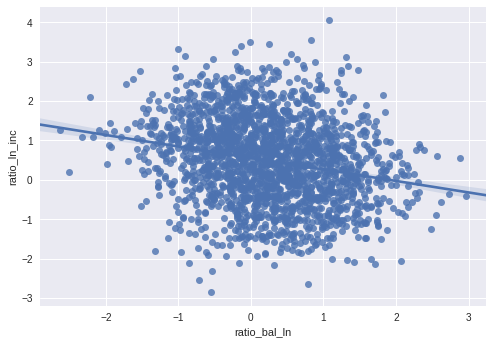

In [18]:
sns.regplot(x='ratio_bal_ln', y='ratio_ln_inc', data=data)

# The above graphs shows that the linear regression fit would be suitable on the data and its bootstrap confidence interval is relatively small

Text(0, 0.5, 'Count')

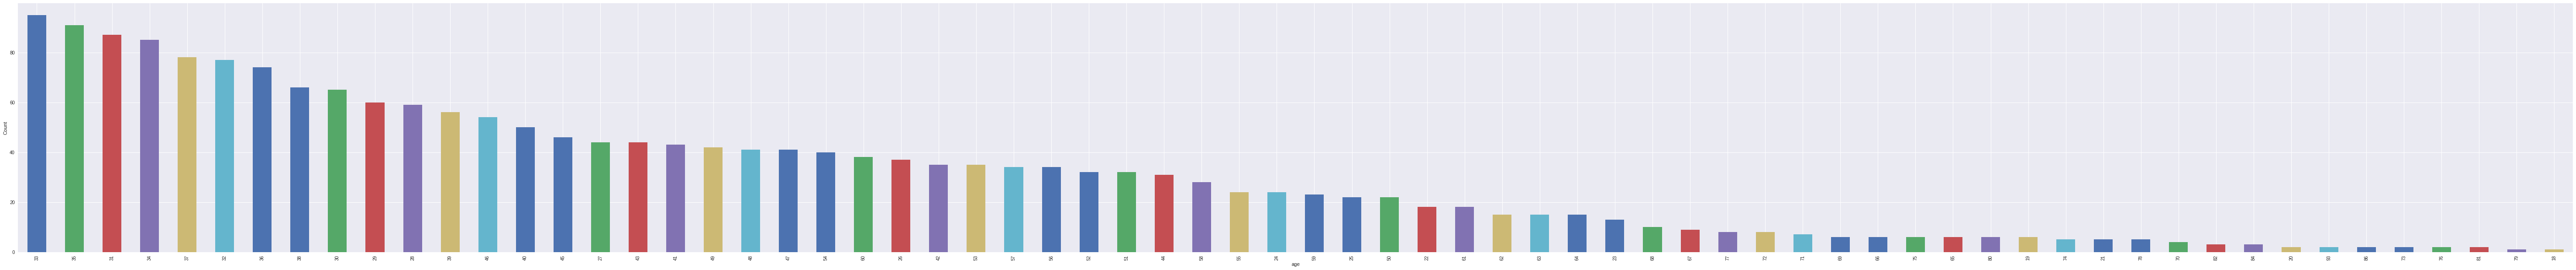

In [19]:
f, ax = plt.subplots(figsize=(100, 10))
data['age'].value_counts().plot(kind='bar',ax=ax)
plt.xlabel('age')
plt.ylabel('Count')

The age of the group is slightly biased in that there isnt an even spread across the age groups as you can see in the above graph as it goes down in age the there are less samples available for the older age groups.

In [20]:
data[data['balance'] <-600].describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,43.000000,-753.333333,0.502334,0.250174,14.500000,144.666667,2.333333,125.333333,0.666667
std,8.221922,123.760521,0.869472,1.053891,11.726039,59.203603,1.505545,138.466843,0.816497
min,33.000000,-980.000000,-0.484309,-1.660590,4.000000,52.000000,1.000000,-1.000000,0.000000
25%,39.000000,-762.000000,-0.115089,0.020877,8.000000,111.000000,1.250000,-1.000000,0.000000
50%,41.500000,-739.500000,0.433826,0.521797,8.000000,158.000000,2.000000,123.000000,0.500000
75%,45.500000,-690.750000,0.904200,0.984313,23.750000,188.500000,2.750000,247.750000,1.000000
max,57.000000,-617.000000,1.867728,1.125650,30.000000,206.000000,5.000000,260.000000,2.000000


50% have a ratio_balance_in and 25% for ration_In_inc with a average age of 43 yrs for a balance = 600

In [21]:
data[data['balance'] >-1000].describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


For balances greater than 1k the mean age is 42 yrs with 24% have a ratio_bal_In at this level while 48% have ration_In_inc at this balance level

# Categorical Categories

In [22]:
data['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
unknown           10
Name: job, dtype: int64

Text(0, 0.5, 'Count')

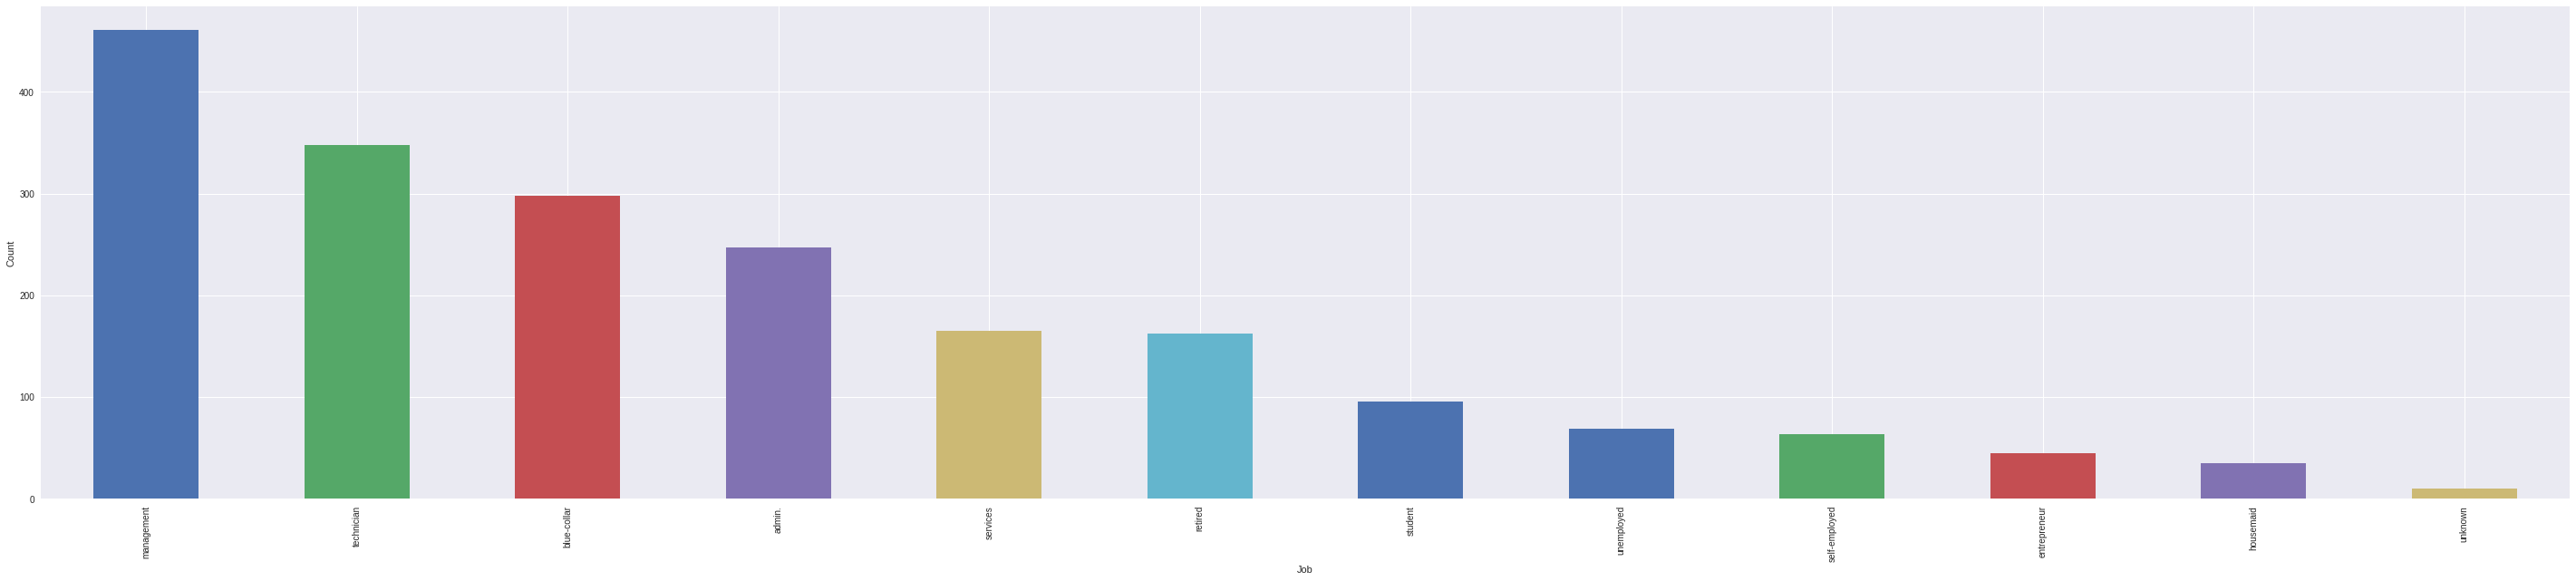

In [23]:
f, ax = plt.subplots(figsize=(50, 10))
data['job'].value_counts().plot(kind='bar',ax=ax)
plt.xlabel('Job')
plt.ylabel('Count')

# A large proporation of population are in management, technical or blue collar jobs explaining that their balance is slightly higher compared to assumed lower income groups

In [24]:
data['education'].value_counts()

secondary    995
tertiary     684
primary      217
unknown      104
Name: education, dtype: int64

Text(0, 0.5, 'Count')

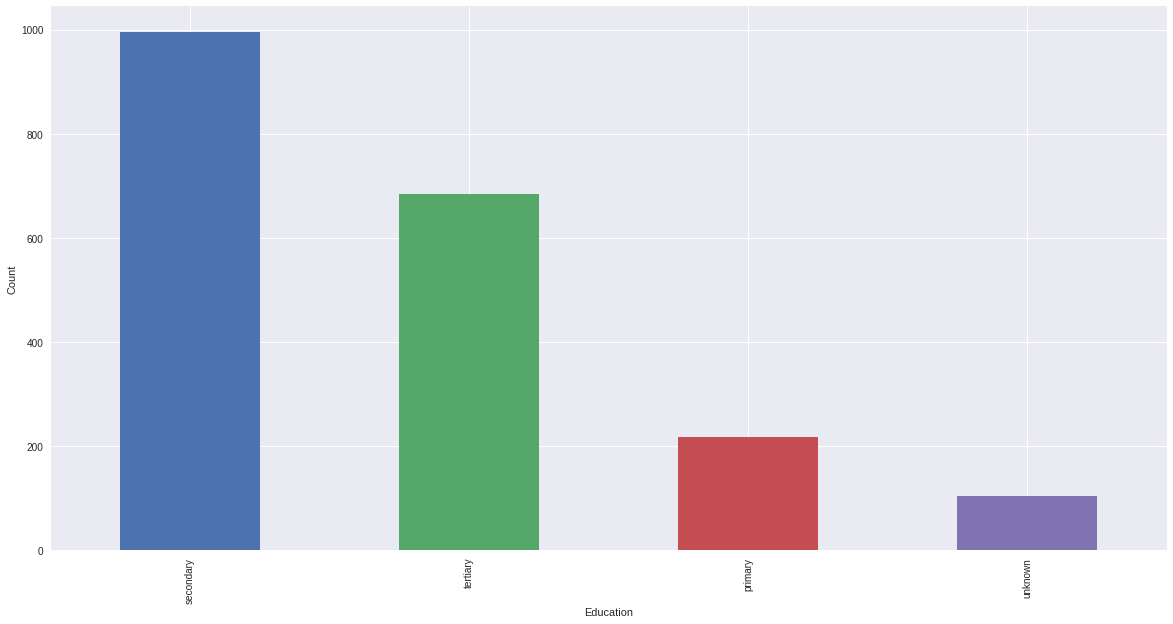

In [25]:
f, ax = plt.subplots(figsize=(20, 10))
data['education'].value_counts().plot(kind='bar',ax=ax)
plt.xlabel('Education')
plt.ylabel('Count')

# A large proportion of the population have received secondary education with a 1/3 of the cohort from secondary not considering to go onto third level education

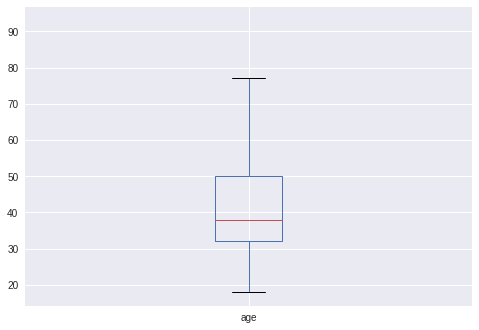

In [26]:
data.boxplot(column='age')

Text(0.5, 0.98, 'Number of individuals that subscribed of a given age')

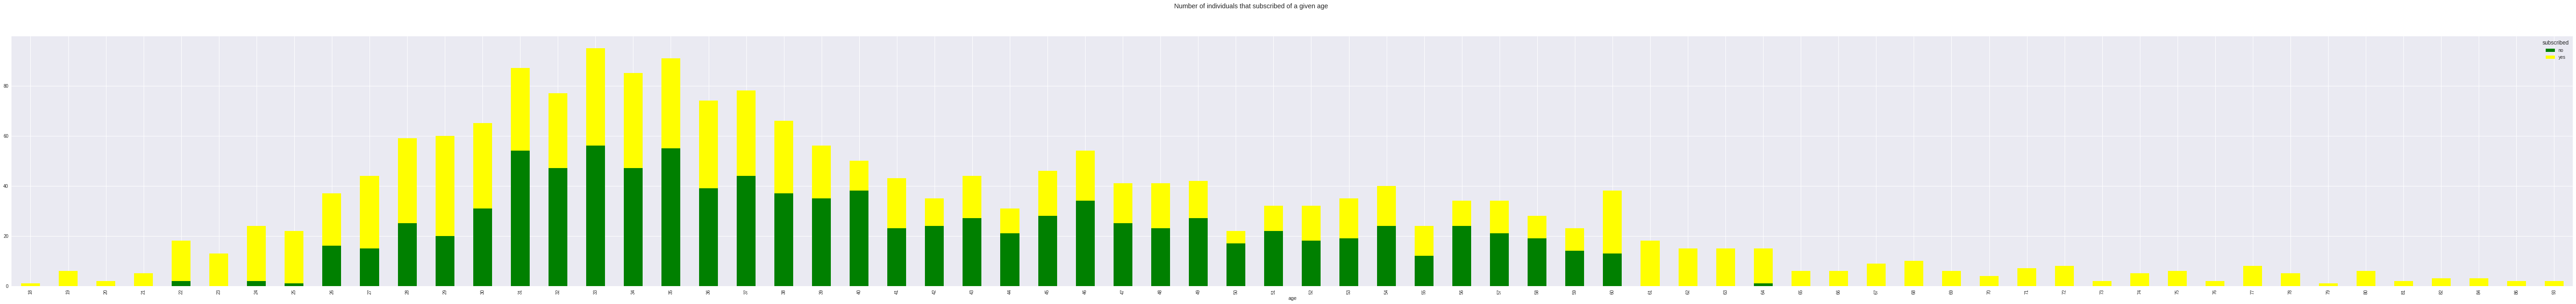

In [27]:
f, ax = plt.subplots(figsize=(100, 10))
age_default = pd.crosstab(data['age'], data['subscribed'])
age_default.plot(kind='bar', stacked=True, color=['green', 'yellow'],ax=ax)
plt.suptitle('Number of individuals that subscribed of a given age')

# The subscriptions are condensed from ages to 26 to 60 with less around the periphery

In [0]:
data['subscribed_code'] = data['subscribed'].map({'yes': 1, 'no': 0})

In [0]:
data['default_code'] = data['default'].map({'yes': 1, 'no': 0})

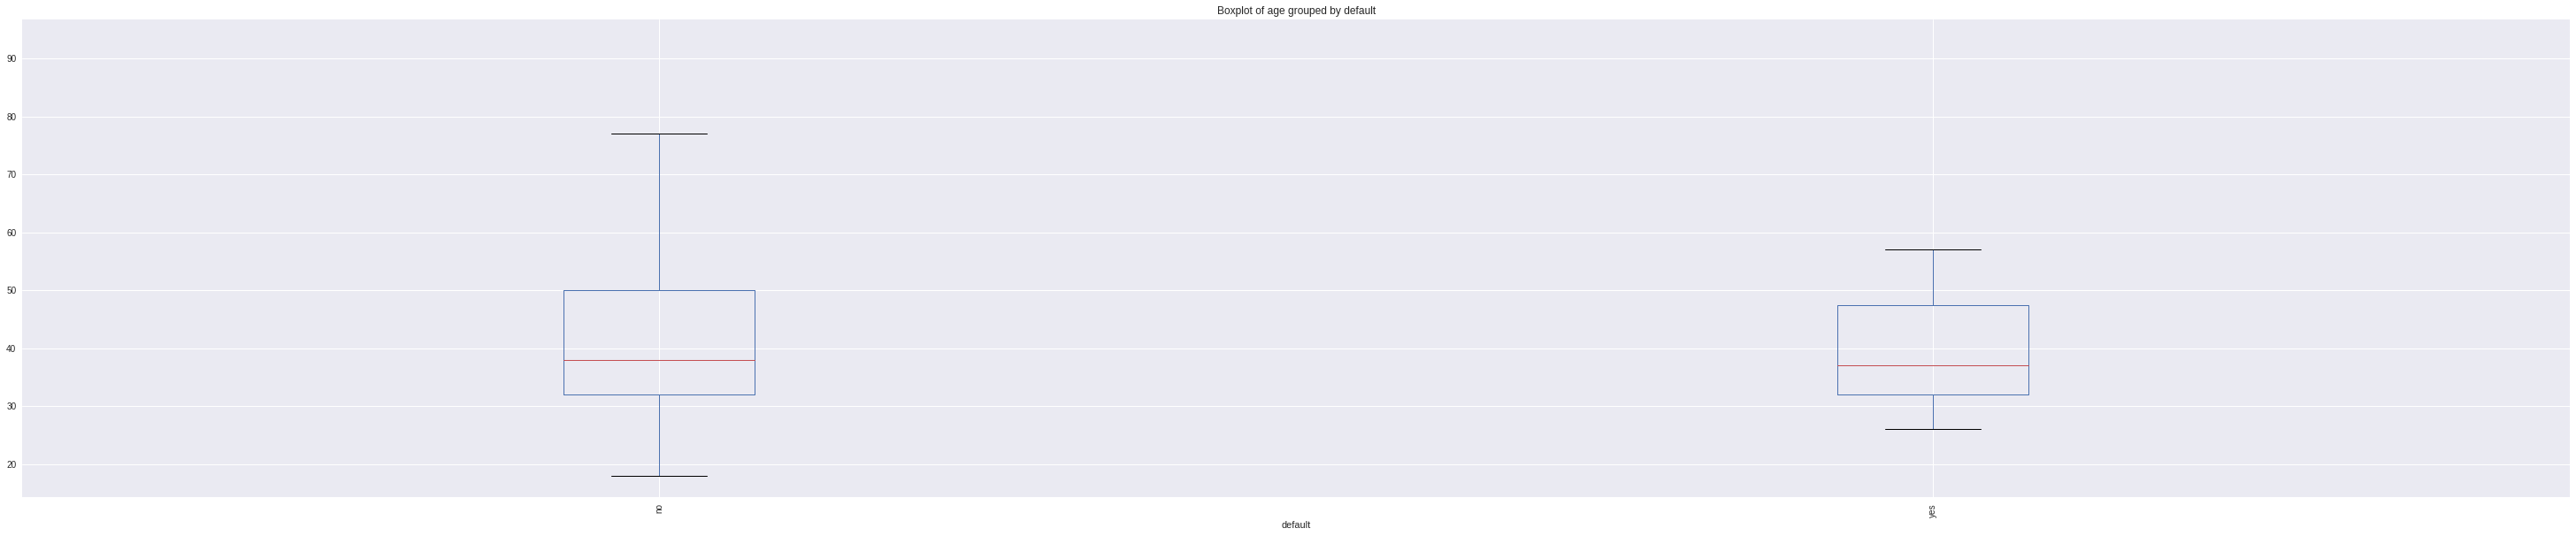

In [30]:
f, ax = plt.subplots(figsize=(50, 10))
data.boxplot(column='age', by='default',ax=ax)
plt.title('Boxplot of age grouped by default')
plt.xticks(rotation=90)
plt.suptitle("")
plt.show()

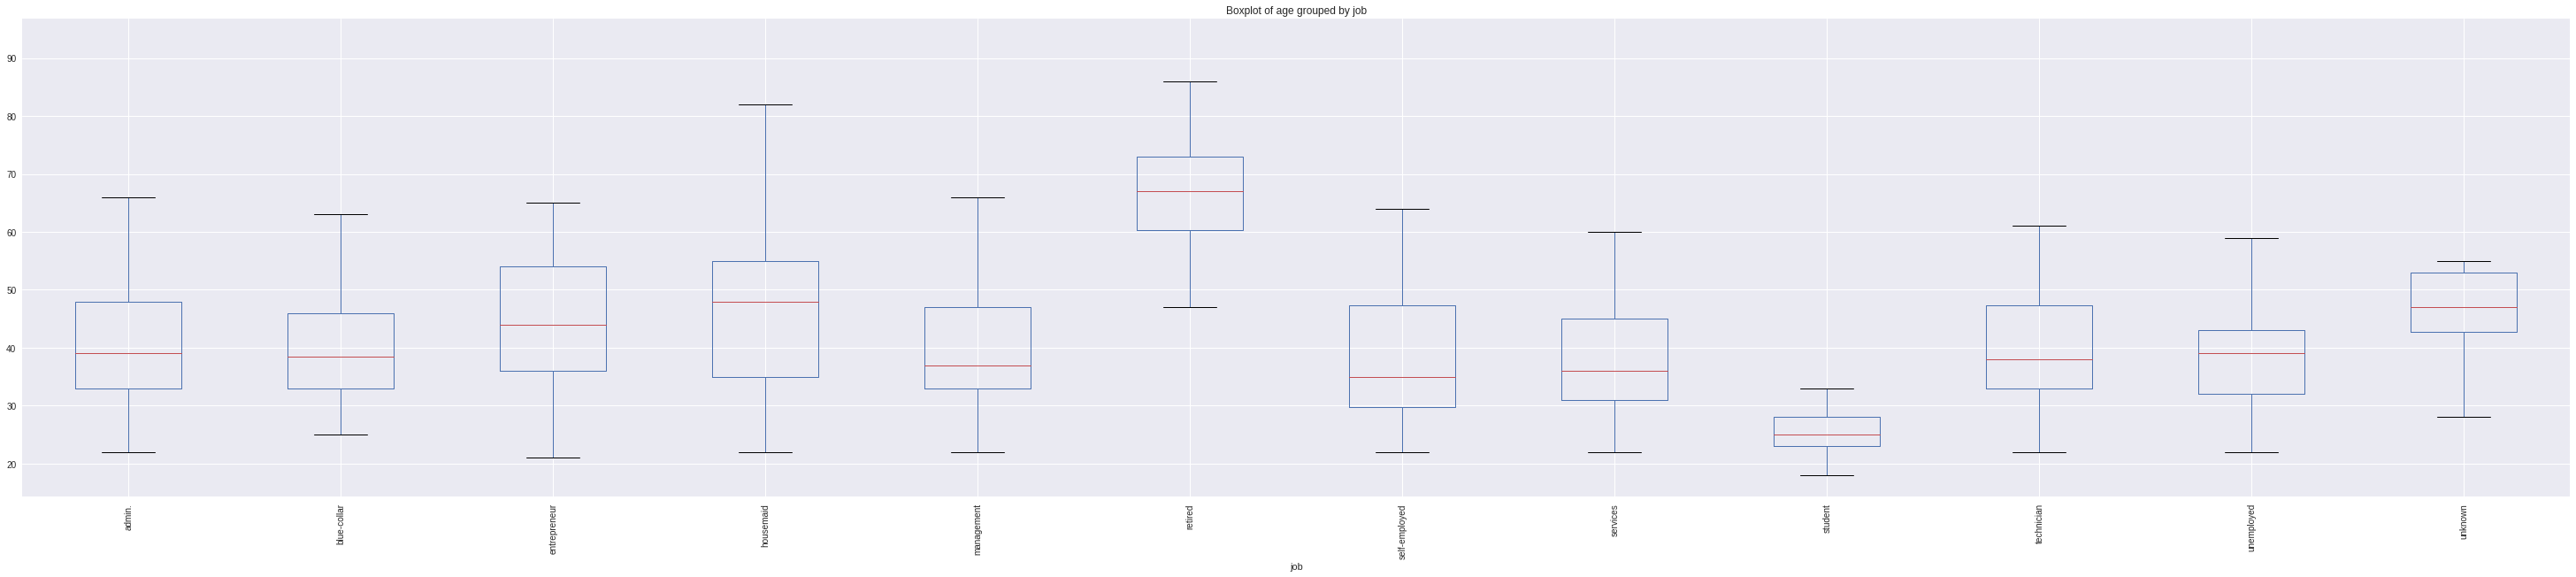

In [31]:
f, ax = plt.subplots(figsize=(50, 10))
data.boxplot(column='age', by='job',ax=ax)
plt.title('Boxplot of age grouped by job')
plt.xticks(rotation=90)
plt.suptitle("")
plt.show()

# A large proporation of the population are in between 32 and 50. This is biased based on age not including an even distribution across the 60,70,80,90 range

# The dataset varies with one individual in the 80's range having a balance of ~80K to a individual in the 95 range having a balance of 0. In between there are 2 individuals between the ranges 70 - 80 having a balance of ~25k.
# There is 1 individual between  50 - 60 having a similar balance of ~25k.
# There is 1 individual of age of 49 having 20k
# There is 1 individual having a ~45 having 30k
# There is 1 individual age of (~32,~42) having a balance of ~25 - ~28k
# There is a small number of samples in 70,80,90 range which is concerning as not an evenly distributed dataset based on age. There is some outliners in the dataset particularly with the one individual in his 80's having a large balance

# There is a large numbers employed in technical/ Management level
# The Job Range is 
# Adminstrators are between ~32 and ~48 with median of ~39
# blue collar workers are between ~33 and ~45 with median a year or two behind admins
# entrpreneurs are between ~36 and ~55 with median between ~45
# housemaids are between ~35 and ~55 with median of 48
# managment are between ~33 and ~48 with median of 34
# retired are between ~60 and ~73 with median of 66
# self employed are between ~30 and ~48 with median of ~34
# services are between ~31 and 44 median of 35
# students are between ~25 and ~29 with median of ~25

Text(0, 0.5, 'Count')

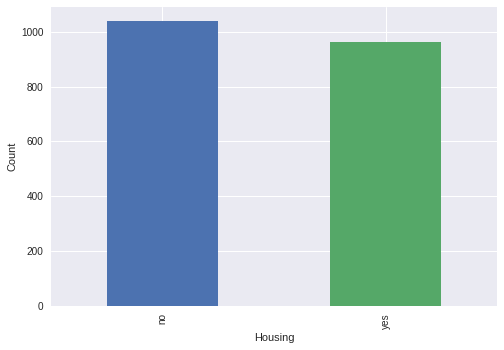

In [32]:
data['housing'].value_counts().plot(kind='bar')
plt.xlabel('Housing')
plt.ylabel('Count')

# There is a greater spead of individuals who do not have housing compared to those who do.

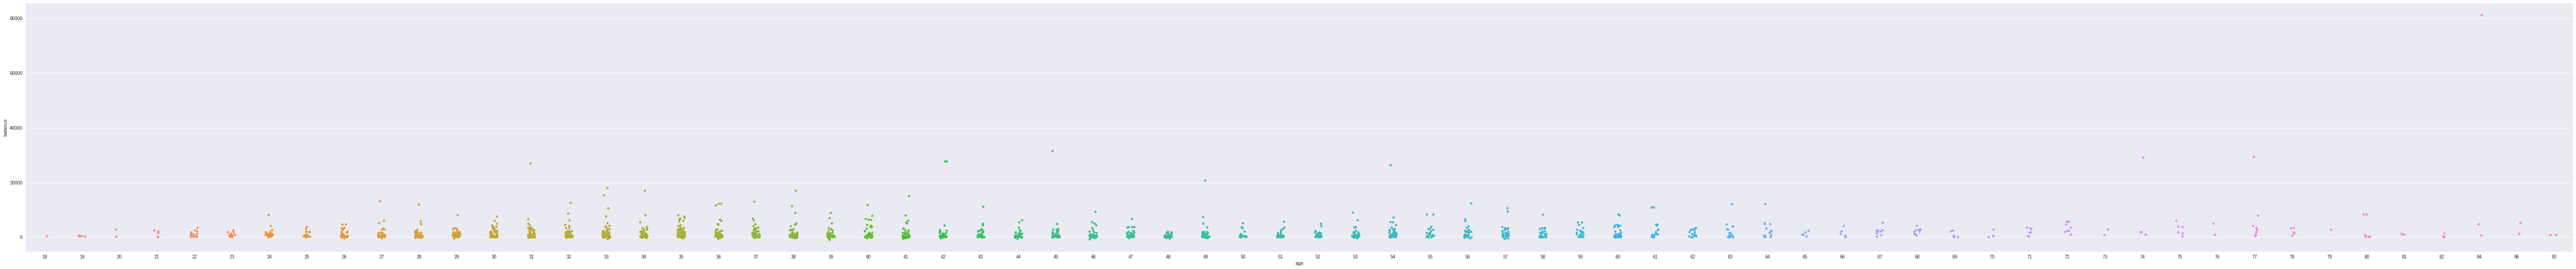

In [33]:
f, ax = plt.subplots(figsize=(100, 10))
sns.stripplot(x=data['age'],y=data['balance'],jitter=True,ax=ax)

# Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

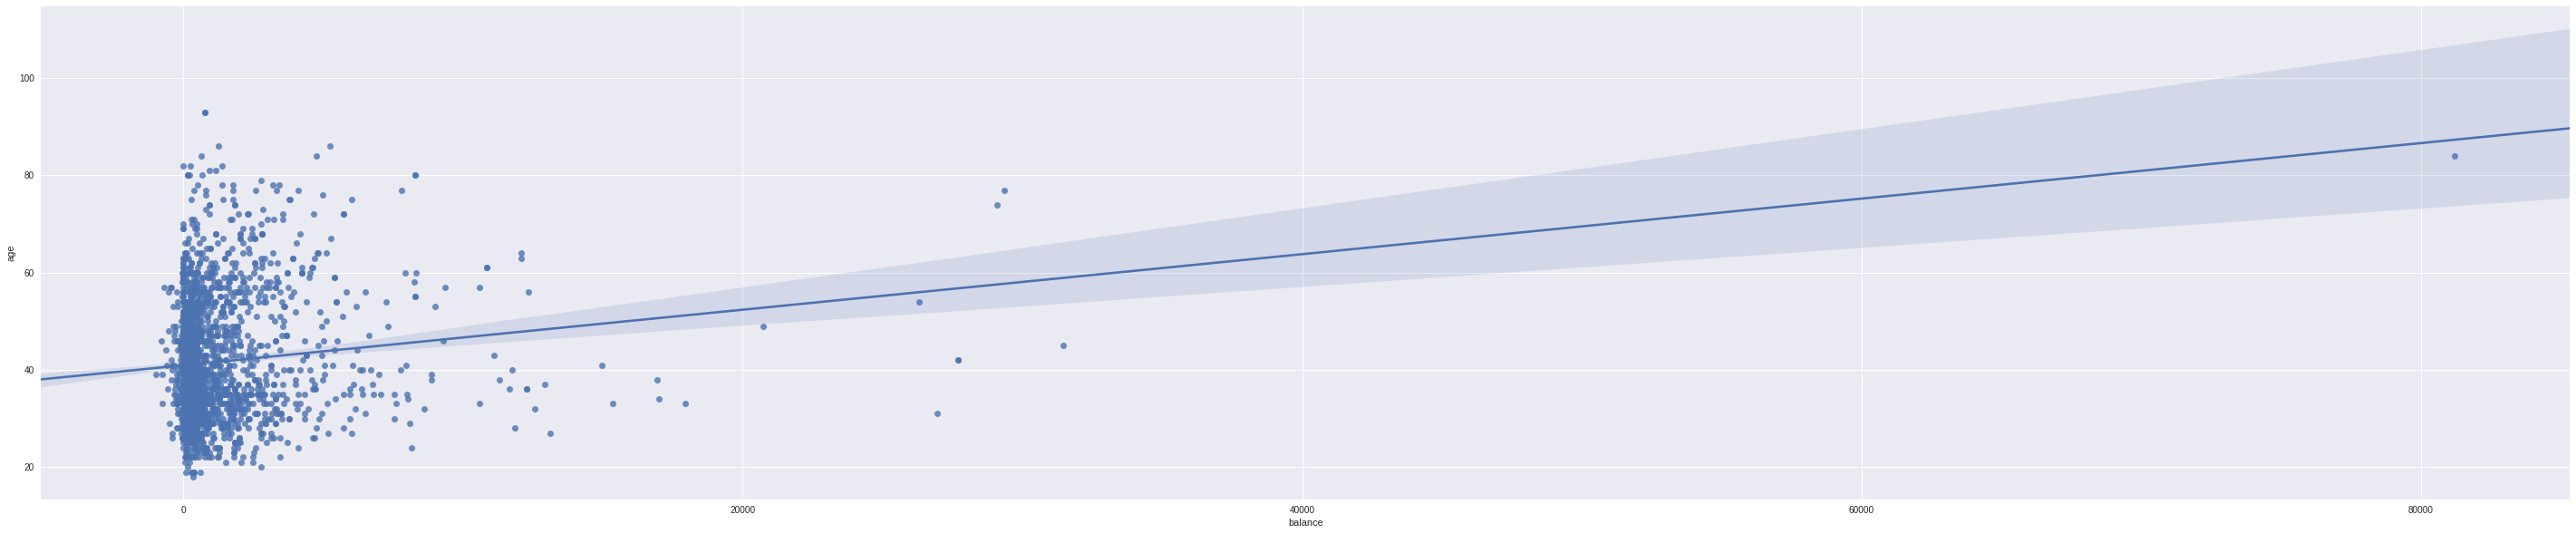

In [34]:
f, ax = plt.subplots(figsize=(50, 10))
sns.regplot(y='age', x='balance', data=data,ax=ax)

# The line through the selected columns shows that this would be suitable for linear regression fit with the confidence interval between bootstrap confidence interval being present

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


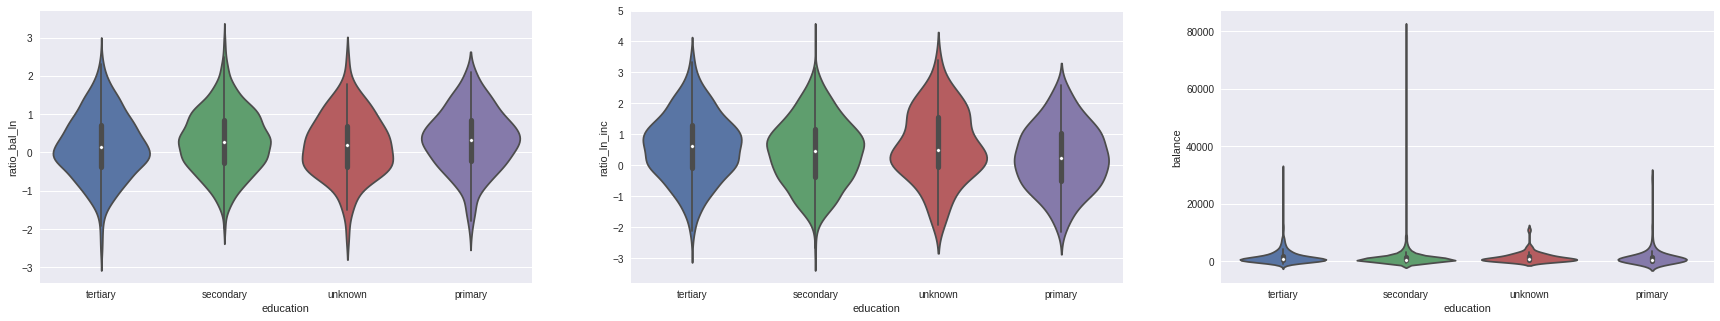

In [35]:
fig, axs = plt.subplots(ncols=3,figsize=(30,5))
sns.violinplot(x='education', y='ratio_bal_ln',data=data, ax=axs[0])
sns.violinplot(x='education', y='ratio_ln_inc',data=data, ax=axs[1])
sns.violinplot(x='education', y='balance', data=data, ax=axs[2])
plt.show()

# Based on the ratio_bal_in , ration_In_inc and balance the education level that fares slight better is those with a secondary education followed by teritary education
# Why could this be? One would assume it would be the other way around.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


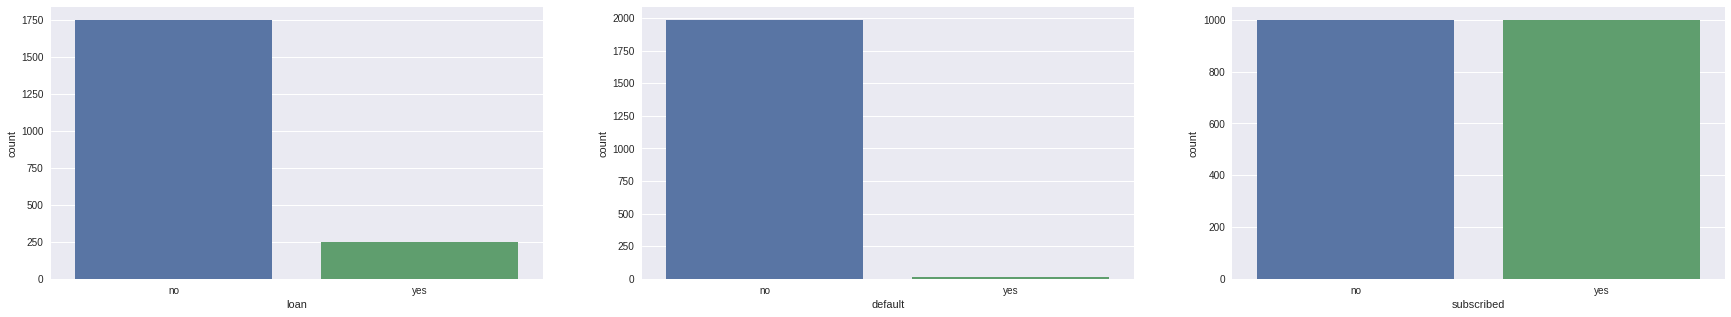

In [36]:
fig, axs = plt.subplots(ncols=3,figsize=(30,5))
sns.countplot(x='loan', data=data, ax=axs[0])
sns.countplot(x='default', data=data, ax=axs[1])
sns.countplot(x='subscribed', data=data, ax=axs[2])
plt.show()

##  There is a large proportion that dont have a loan with small percentage 250 that does have a loan.
##  There is a small percentage of those likely to default with small percentage looking at around ~1% that would default.
## There is an even number of individuals subscribed this being the best categorical category to base a prediction on

# Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.

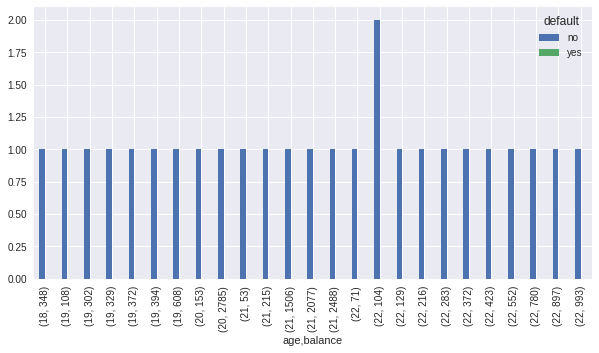

In [171]:
tab = pd.crosstab([data.age, data.balance], data.default)
tab[:25].plot(kind='bar', stacked=False)
plt.show()

# A comparison between the age, balance and default risk show among the ages of 33,44,41,48,57,26 are in default risk

Text(0, 0.5, 'Age')

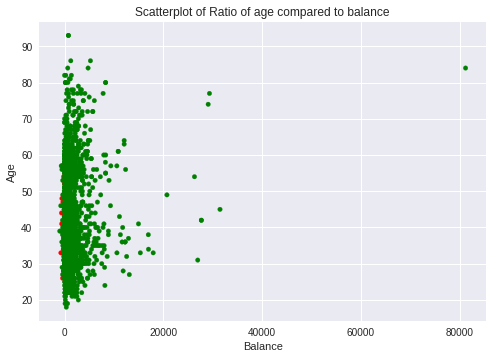

In [38]:
colors = data.default.map(dict(yes='red', no='green'))
data.plot.scatter(x='balance', y='age',  color=colors)
plt.title('Scatterplot of Ratio of age compared to balance')
plt.xlabel('Balance')
plt.ylabel('Age')

There is no overlap between these variable just to highlight that this will not work for the classification. Just to be used a good reference of how not to look for data.

Text(0, 0.5, 'Ratio of Loan to Income')

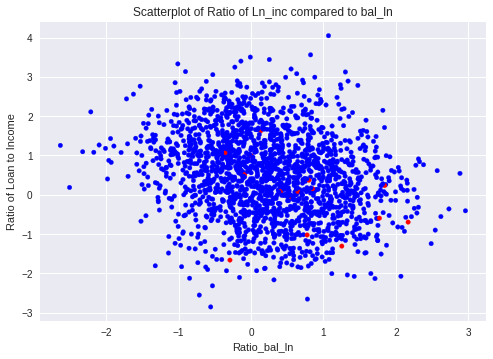

In [39]:
colors = data.default.map(dict(yes='red', no='blue'))
data.plot.scatter(x='ratio_bal_ln', y='ratio_ln_inc',  color=colors)
plt.title('Scatterplot of Ratio of Ln_inc compared to bal_ln')
plt.xlabel('Ratio_bal_ln')
plt.ylabel('Ratio of Loan to Income')

In Comparison this is ideal for classification given a strong overlap in variables of ratio_bal_in and ration_In_inc


# You won't find two numerical attributes that will perfectly classify a dependent variable. Pick the best you can find.

The ideal variable for classification are
X = data['ratio_balance_in'] and data['ratio_ln_inc'] and Y= data['Subscribed']
A bad classification example would be:
X = data['age'] and data['balance']  although the regplot does show it is possible run a linear regression on this data as the data and Y= data['default']. 

# Task 3
# Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:

* Input space X
This is the variable X that contains two numerical categories from the dataset of 2000 Records i.e [‘ratio_bal_ln’,’ratio_ln_inc’] or [‘Age’,’Balance’] 
* Output space Y
This is the predictor variable Y that is a categorical category with the dataset of the 2000 in X ['subscribed'] ,[‘default’] 
* Unknown target function f : X -> Y
Is the ideal formula for predicting whether a individual has subscribed or defaulted.
* Data set D  (historical records of bank) 
This is the 2000 historical records of the bank i.e (X1,y1).....(Xn,Yn)
* Hypothesis set H (Set of Candidate Formulas)
This is the set of candidate formulas 
* Final Hypothesis g = f 
The decision is based on the g (hypotheis that the learning algorithm produced not on f where the ideal target function that remains unknown
* In-sample error Ein(g)
This is error rate within the training sample this is explicitly dependent on the hypothesis we are considering.
* Out-of-sample error Eout(g)
This measures how well the our training on D has generalised to the data that we have not seen before. It is based on the entire input space X. These points must be fresh and have not been used for training

# PT[Ein(h) - Eout(h)] |> e] <= 2e-2e^2N

# Task 4

# Once you are satisfied you understand these results, run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).

![The Learning Diagram]( .\images\LearningDiagramplusnoise.jpg "The Learning Diagram")

In [0]:
# H Set of Candidate Formulas
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [0]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors

In [0]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights,x_min), point_on_boundary(weights,x_max)]

In [0]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [0]:
# A Algorithm
def pla(training_in, training_out,weights,max_iterations):
    bias = np.array([1])
    iterations=0
    while iterations < max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                print("x:{} new weights:{} bias:{} errors:{}".format(x, weights, bias, errors))
                errors+=1;
        if (errors == 0):
            print("Hypothesis discovered at iterations:", iterations)
            break
        
    return weights, iterations

In [0]:
# random weights for the size of X
def init_weights(X,random_state):
    random_generator = np.random.RandomState(random_state)
    x_rows, x_columns = X.shape
    x_columns = x_columns+1
    return random_generator.normal(loc=0.0, scale=0.001, size=x_columns) 

> *"Pocket Algorithm : Take the best result and put in 'pocket' keep the best solution. when you get a better one throw it and keep new one. NOTE: PLA but just has memory"*

In [0]:
def pocket(training_in, training_out, weights, max_iterations):
    bias = np.array([1])
    np.array([1])
    iterations=0
    pocket_weights = weights
    pocket_iterations=0
    pocket_error = calc_error(training_in, training_out, weights)
    while iterations < max_iterations:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                err = calc_error(training_in, training_out, weights)
                if (err < pocket_error):
                    pocket_error = err
                    pocket_weights = weights
                    pocket_iterations = iterations
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return pocket_weights, pocket_iterations

In [0]:
def print__(X, y,weights,isboundary):
    if isboundary:
        y_bound = np.zeros([2])
        X_bound = np.zeros([2])
    
        X_bound[0] = X[:,0].min()
        X_bound[1] = X[:,0].max()

    colors = ['yellow' if yy == 1 else 'orange' for yy in y] 
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    if isboundary:
        y_bound[0], y_bound[1] = decision_boundary(weights, X_bound[0], X_bound[1])
        plt.plot(X_bound, y_bound, linestyle='dashed', color='black')
    
    plt.show() 

# Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. Take note of the number of iterations that were required to come to the final hypothesis and the final error. 

In [0]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [0]:
X_train_weights = init_weights(X_train,1)

In [51]:
print(X_train_weights)

[ 0.00162435 -0.00061176 -0.00052817]


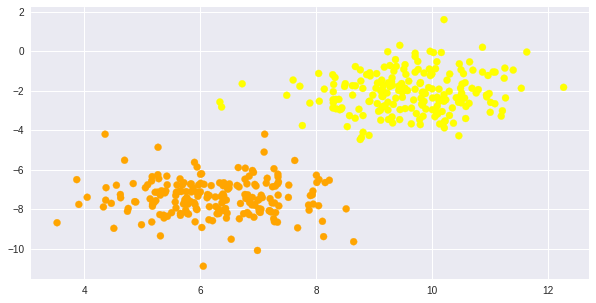

In [52]:
print__(X_test,y_test,X_train_weights,False)

In [53]:
blob_weights, blob_iterations = pla(X_train,y_train,X_train_weights,10)
print(blob_weights, blob_iterations)

x:[ 5.09369845 -7.9365411 ] new weights:[-0.99837565 -5.09431021  7.93601293] bias:[1] errors:0
x:[ 7.80129405 -1.53632606] new weights:[1.62434536e-03 2.70698384e+00 6.39968687e+00] bias:[1] errors:1
x:[ 7.57375862 -3.42846319] new weights:[ 1.00162435 10.28074246  2.97122368] bias:[1] errors:2
x:[ 7.03997728 -6.8664863 ] new weights:[1.62434536e-03 3.24076518e+00 9.83770999e+00] bias:[1] errors:3
x:[ 9.03501042 -3.40192134] new weights:[ 1.00162435 12.2757756   6.43578865] bias:[1] errors:4
x:[ 5.52380651 -6.99799024] new weights:[1.62434536e-03 6.75196909e+00 1.34337789e+01] bias:[1] errors:5
x:[ 8.39876583 -4.25469166] new weights:[ 1.00162435 15.15073492  9.17908723] bias:[1] errors:6
x:[ 7.2308394  -7.94931617] new weights:[1.62434536e-03 7.91989551e+00 1.71284034e+01] bias:[1] errors:7
x:[ 7.73280267 -3.62883133] new weights:[ 1.00162435 15.65269818 13.49957207] bias:[1] errors:8
x:[ 6.38880634 -6.64486271] new weights:[1.62434536e-03 9.26389184e+00 2.01444348e+01] bias:[1] erro

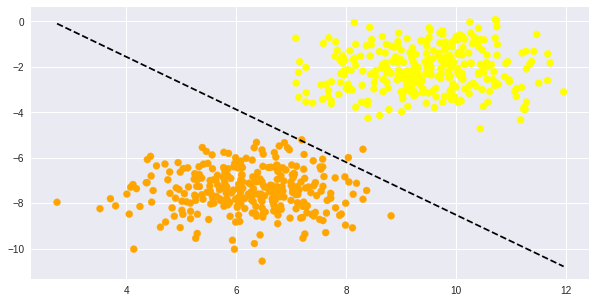

In [54]:
print__(X_train,y_train,X_train_weights,True)

In [55]:
calc_error(X_train,y_train,X_train_weights) #Train Error

597

In [56]:
calc_error(X_test,y_test,X_train_weights) #Test Error

397

# On the blobs datasets the data is linerly seperable as the bound aligns to seperate both datasets. It converges early in its iterations. The training error is also high of 599. It slighly goes down to 400 on the test set with the same weights

In [0]:
Xd1 = data[['ratio_bal_ln', 'ratio_ln_inc']].values
yd1 = data['subscribed_code'].values

In [0]:
Xd1_shuffled, yd1_shuffled = shuffle(Xd1, yd1, random_state=0)

In [0]:
Xd1_train, Xd1_test, yd1_train, yd1_test = train_test_split(Xd1_shuffled,yd1_shuffled, test_size=0.4,shuffle=True)

In [0]:
Xd1_train_weights = init_weights(Xd1_train,34)

In [159]:
Xd1best_weights,Xd1_iteration = pocket(Xd1_train,yd1_train,Xd1_train_weights,10)
print('Weight Set: %s' % Xd1best_weights)
print('weights found at Iteration: %s' % Xd1_iteration)

Weight Set: [ 3.00024384 -0.38266629  0.48042941]
weights found at Iteration: 168


In [160]:
error = calc_error(Xd1_test, yd1_train, Xd1best_weights)
print("E-In: %s " % error)

E-In: 398 


In [161]:
error = calc_error(Xd1_test, yd1_test, Xd1best_weights)
print("E-out: %s " % error)

E-out: 389 


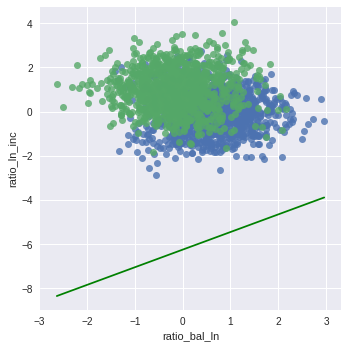

In [162]:
sns.lmplot(x="ratio_bal_ln", y="ratio_ln_inc", data=data, fit_reg=False, hue='subscribed', legend=False)
x_min, x_max = min(Xd1[:,0]), max(Xd1[:,0])
y_min, y_max = decision_boundary(Xd1best_weights, x_min, x_max)

plt.plot([x_min, x_max], [y_min, y_max], 'g-')
plt.show()

# The PLA Algorithm performs badly not knowing where the center of the data is based on the random weights provided to it at run time

In [163]:
Ein = []
Eout = []
for i in range(MAX_ITERATIONS):
    #select a random training and test set
    X_train, X_test, y_train, y_test = train_test_split(Xd1, yd1, test_size=0.3, random_state=39)
    
    #Initialize all weights to 0 or a small random number  
    pla_bank_weights = init_weights(X_train,34)
    
    #run the pocket algorithm
    out_weights = []
    out_iterations = 0
    out_weights, out_iterations = pocket(X_train, y_train, pla_bank_weights, 10000)

    #store Ein (in-sample error)
    Ein.append(calc_error(X_train, y_train, out_weights))

    #store Eout (out-of-sample error)
    Eout.append(calc_error(X_test, y_test, out_weights))
    
    print('Experiments completed: ', i+1)

Experiments completed:  1
Experiments completed:  2
Experiments completed:  3
Experiments completed:  4
Experiments completed:  5
Experiments completed:  6
Experiments completed:  7
Experiments completed:  8
Experiments completed:  9
Experiments completed:  10


In [167]:
print(Ein)
print(Eout)

[693, 693, 693, 693, 693, 693, 693, 693, 693, 693]
[307, 307, 307, 307, 307, 307, 307, 307, 307, 307]


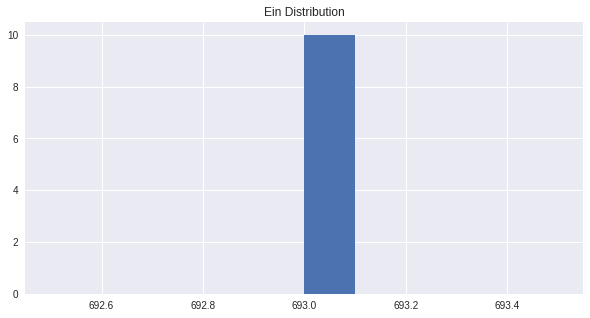

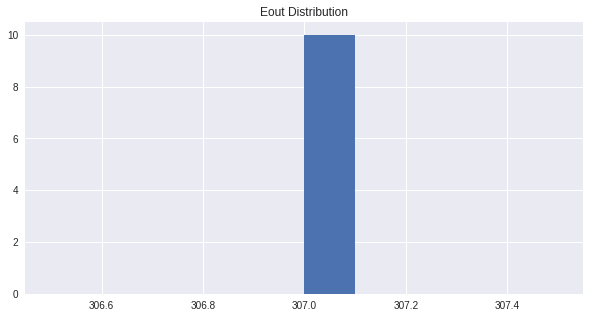

In [165]:
plt.hist(Ein)
plt.title('Ein Distribution')
plt.show()
plt.hist(Eout)
plt.title('Eout Distribution')
plt.show()

<function matplotlib.pyplot.show>

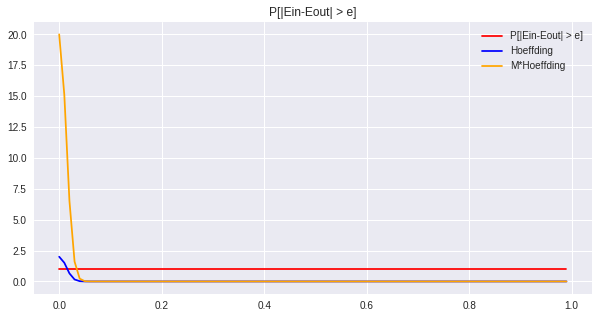

In [166]:
prob_epsilon=[]
epsilons = np.arange(0, 1, 0.01)
for e in epsilons:
    prob_epsilon.append(len([1 for i in range(len(Ein)) if abs(Ein[i] - Eout[i]) > e])/len(Ein))

plt.figure()
plt.plot(epsilons, prob_epsilon, color='r', label = 'P[|Ein-Eout| > e]')
plt.plot(epsilons, [2*math.exp(-2*e**2*len(X_train)) for e in epsilons], color='b', label='Hoeffding')
plt.plot(epsilons, [MAX_ITERATIONS*2*math.exp(-2*e**2*len(X_train)) for e in epsilons], color='orange', label='M*Hoeffding')
plt.title('P[|Ein-Eout| > e]')
#set the axes min and max to allow us zoom in on the area of interest

plt.legend()
plt.show

#### References
* [1] [Implementing PLA] (https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/)
* [2] [Reference Slides] (http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect02.pdf)
* [3] [PLA Algorithm] (http://www.insightsbot.com/blog/C8Fm4/perceptron-algorithm-part-2-python-code-machine-learning-101)
* [4] [Scikitlearn Reference] (https://www.youtube.com/watch?v=oLane_Vh3CU)
* [5] [Logistic Regression] (https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/)
* [6] [Perceptron Reference] (https://www.jilp.org/cbp/Daniel-slides.PDF)

[Muselli, M. (1997) On convergence properties of pocket algorithm. Neural Networks, IEEE Transactions on. [Online] 8 (3), 623–629.]

Code Reference from peers
Aidan K, Martin P, Brian P